In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [2]:
hotel=pd.read_csv("D:/Exercises and Datasources/Datasets/Hotel Reservations/Hotel Reservations.csv")

In [3]:
hotel.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
hotel.shape

(36275, 19)

Overview of the columns:

Booking_ID: This is likely a unique identifier for each booking.

no_of_adults: The number of adults included in the reservation.

no_of_children: The number of children included in the reservation.

no_of_weekend_nights: The number of nights stayed over a weekend.

no_of_week_nights: The number of nights stayed during the week.

type_of_meal_plan: The type of meal plan selected for the stay.

required_car_parking_space: Indicates if a car parking space is required.

room_type_reserved: The type of room reserved.

lead_time: The number of days between the booking and the stay.

arrival_year: The year of arrival.

arrival_month: The month of arrival.

arrival_date: The date of arrival.

market_segment_type: The market segment from which the booking originated.

repeated_guest: Indicates if the guest has previously stayed at the hotel.

no_of_previous_cancellations: The number of previous bookings that were canceled by the customer.

no_of_previous_bookings_not_canceled: The number of previous bookings not canceled.

avg_price_per_room: The average price per room for the stay.

no_of_special_requests: The number of special requests made by the guest.

booking_status: The status of the booking (e.g., canceled, not canceled).

In [5]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [6]:
hotel.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

No null values are present in the dataset

In [7]:
hotel.duplicated().sum()

0

No duplicates found either

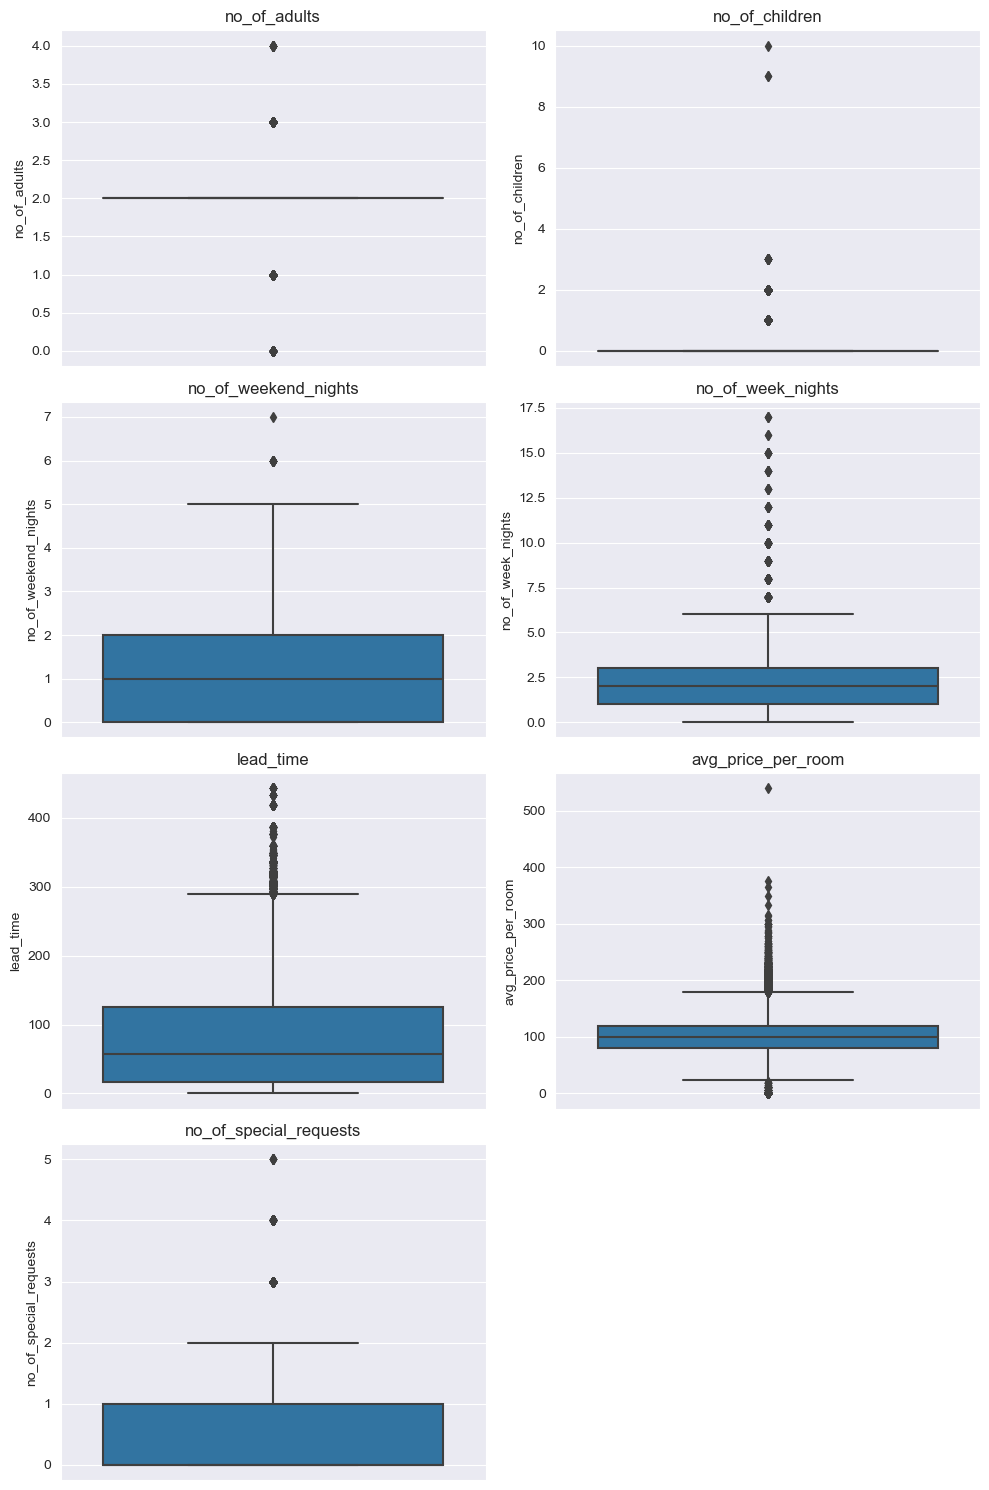

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,85.232557,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,85.930817,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,17.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,57.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,126.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,443.000000,540.000000,5.000000


In [8]:

numerical_columns = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
                     'lead_time', 'avg_price_per_room', 'no_of_special_requests']

# Statistical summary of the numerical columns
statistical_summary = hotel[numerical_columns].describe()

# Creating boxplots for each numerical column
plt.figure(figsize=(10, 15))
for i, column in enumerate(numerical_columns):
    plt.subplot(4, 2, i+1)
    sns.boxplot(y=hotel[column])
    plt.title(column)

plt.tight_layout()
plt.show()

statistical_summary



There are Outliers in the data but they seem to be consistent with the Data

In [9]:
hotel.describe(include='O')

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,36275,36275,36275,36275,36275
unique,36275,4,7,5,2
top,INN00001,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,1,27835,28130,23214,24390


Investigating Categorical columnns

In [10]:
# Identifying categorical columns
categorical_columns = hotel.select_dtypes(include=['object', 'category']).columns

# Getting unique values in each categorical column

for column in categorical_columns:
    print('---------------------------------')
    print(f"The Unique values in {column } are :{hotel[column].unique()}")


---------------------------------
The Unique values in Booking_ID are :['INN00001' 'INN00002' 'INN00003' ... 'INN36273' 'INN36274' 'INN36275']
---------------------------------
The Unique values in type_of_meal_plan are :['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
---------------------------------
The Unique values in room_type_reserved are :['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
---------------------------------
The Unique values in market_segment_type are :['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
---------------------------------
The Unique values in booking_status are :['Not_Canceled' 'Canceled']


Based on the checks performed,the assessment of the "hotel" dataset's cleanliness is as follows:

Missing Values: There are no missing values in any of the columns, which is a good sign of data completeness.

Duplicate Entries: There are no duplicate rows in the dataset, indicating uniqueness in the data entries.

Data Types: The data types for each column seem appropriate

Consistency in Categorical Data: The unique values in the categorical columns appear consistent and correctly formatted. There are no apparent typos or different representations of the same category.



# Exploratory Data Analysis

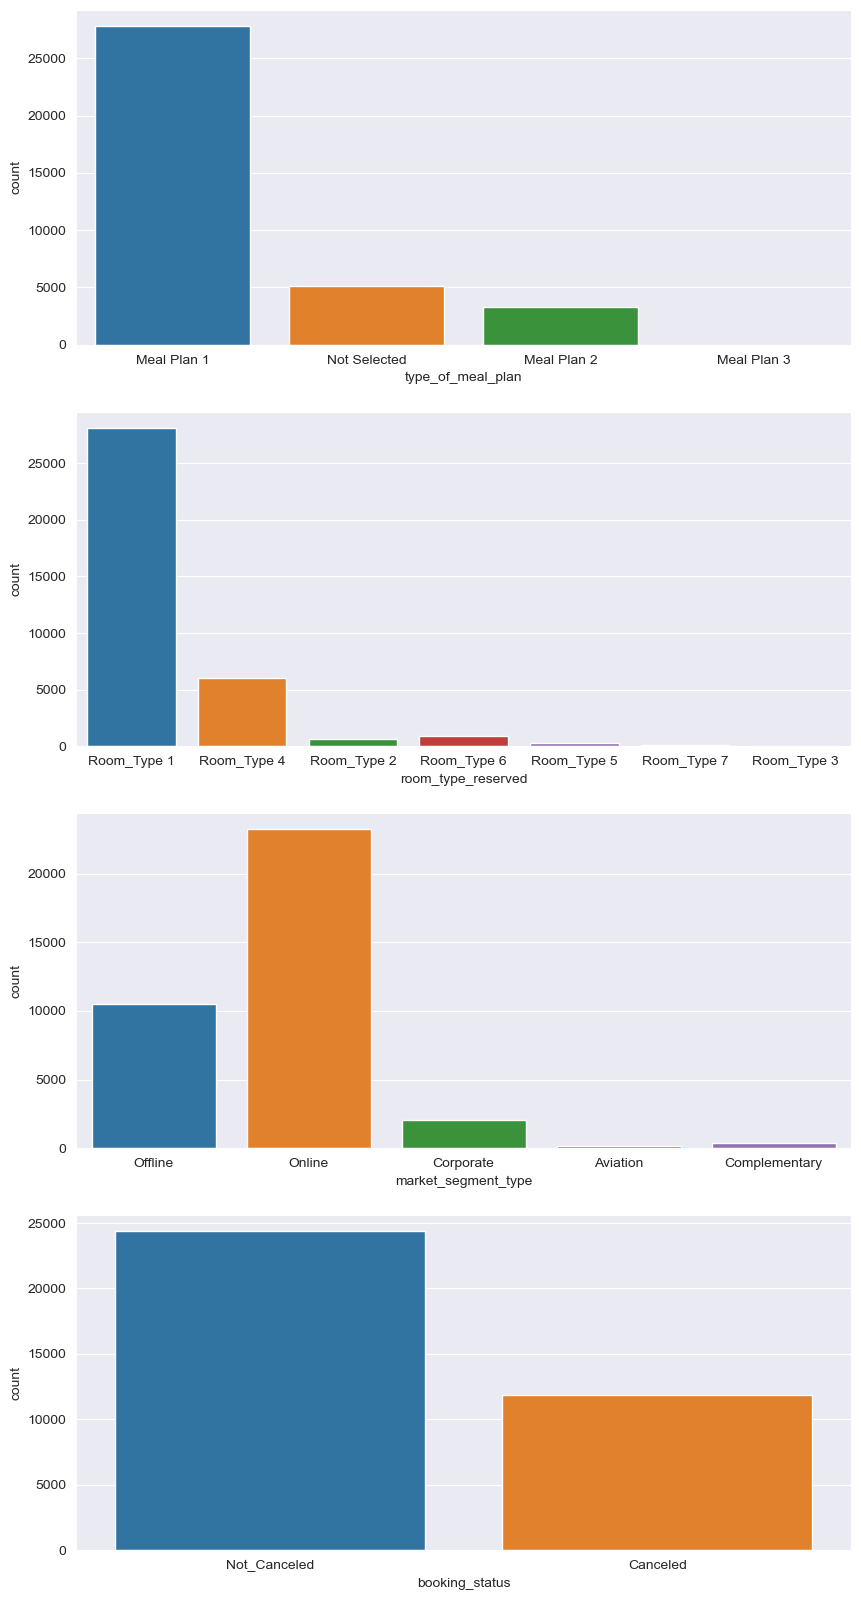

In [11]:
fig,ax=plt.subplots(4,1,figsize=(10,20))
sns.countplot(data=hotel,x='type_of_meal_plan',ax=ax[0])
sns.countplot(data=hotel,x='room_type_reserved',ax=ax[1])
sns.countplot(data=hotel,x='market_segment_type',ax=ax[2])
sns.countplot(data=hotel,x='booking_status',ax=ax[3])
plt.show()


Room#1 and Meal Plan#1 are the most Common choice

Online Market segment is most common

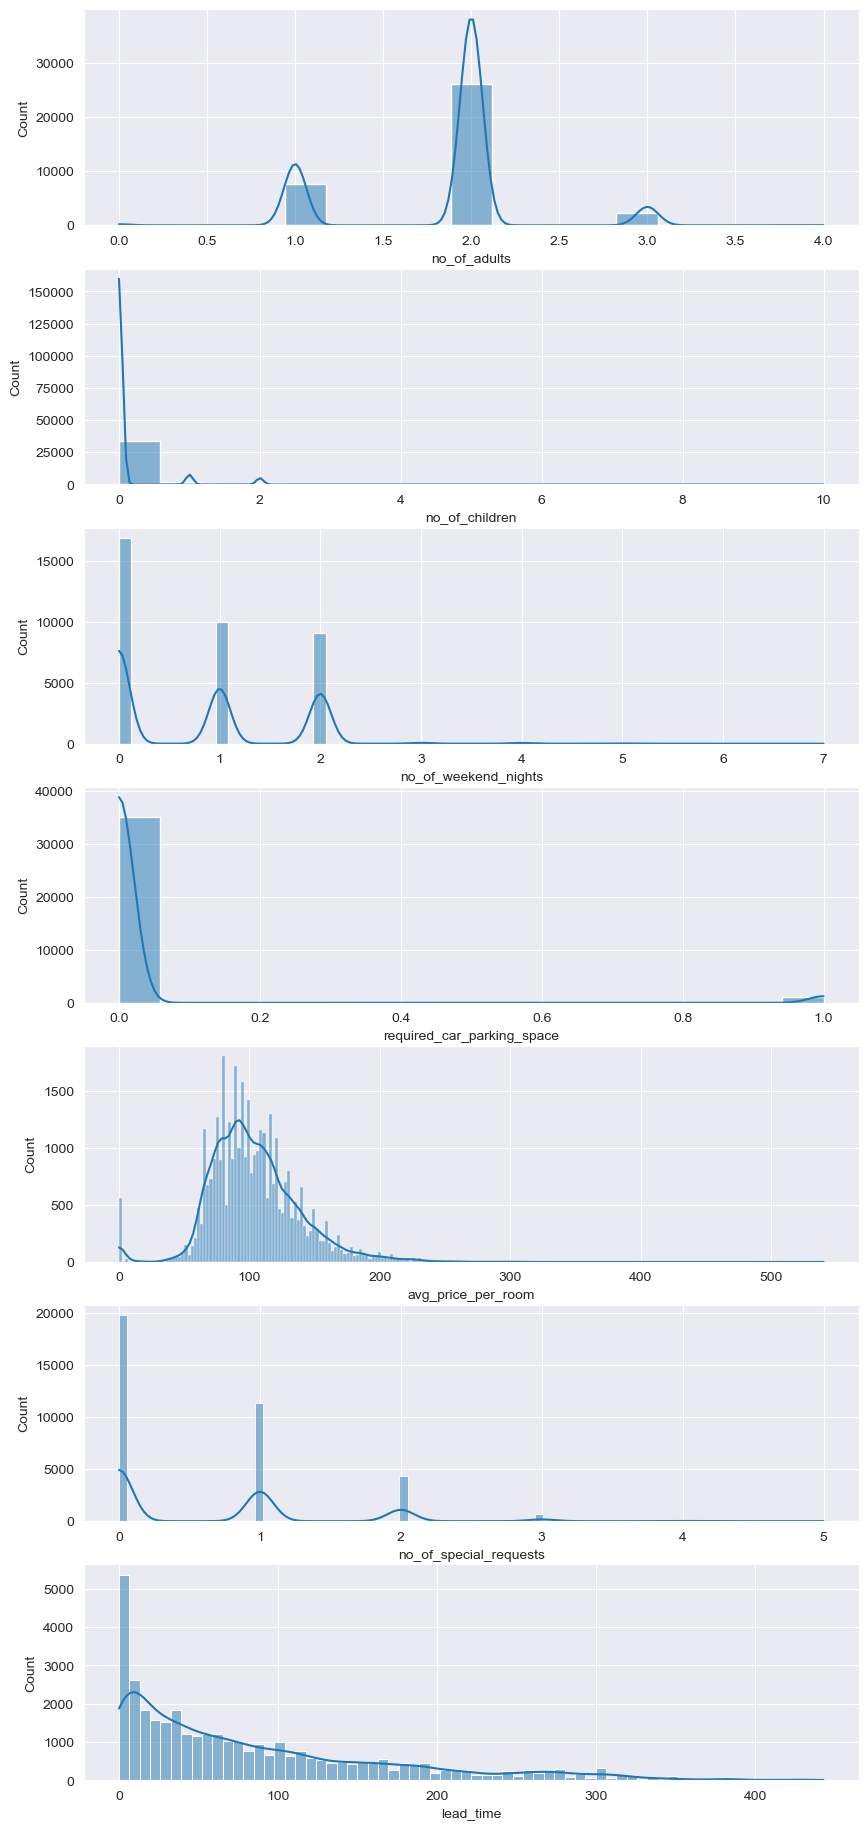

In [12]:
fig,ax=plt.subplots(7,1,figsize=(10,23))
sns.histplot(data=hotel,x='no_of_adults',kde=True,ax=ax[0])
sns.histplot(data=hotel,x='no_of_children',kde=True,ax=ax[1])
sns.histplot(data=hotel,x='no_of_weekend_nights',kde=True,ax=ax[2])
sns.histplot(data=hotel,x='required_car_parking_space',kde=True,ax=ax[3])
sns.histplot(data=hotel,x='avg_price_per_room',kde=True,ax=ax[4])
sns.histplot(data=hotel,x='no_of_special_requests',kde=True,ax=ax[5])
sns.histplot(data=hotel,x='lead_time',kde=True,ax=ax[6])
plt.show()

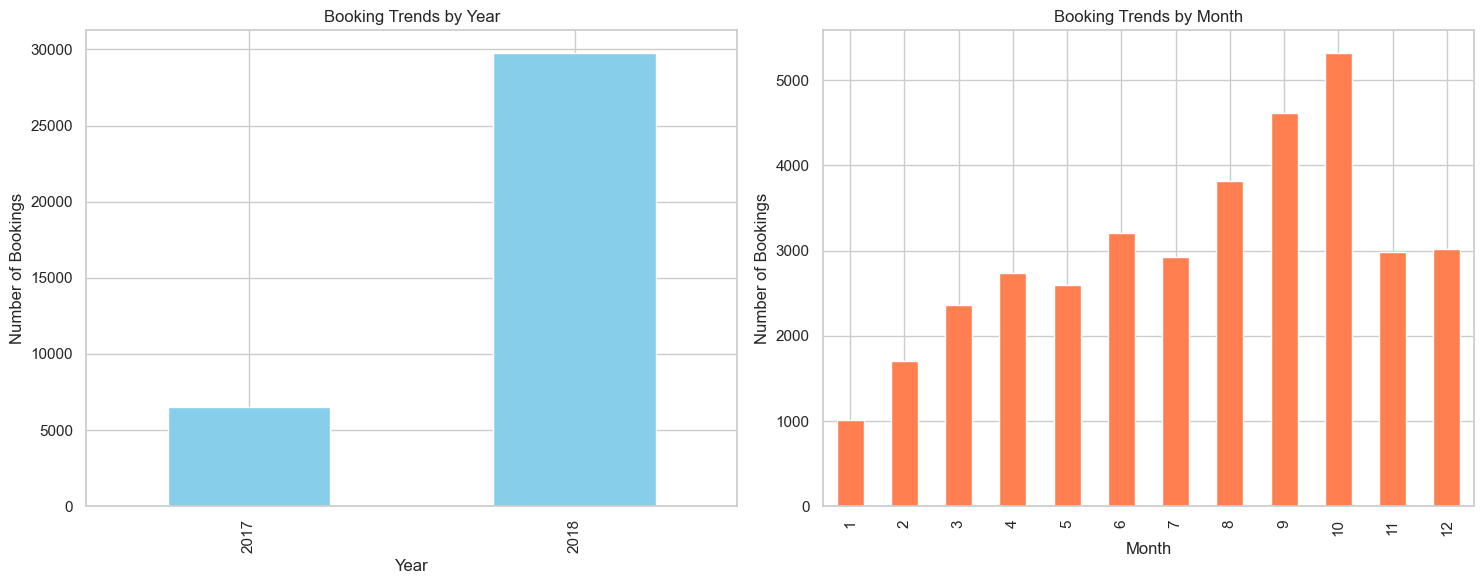

In [13]:

sns.set(style="whitegrid")

# Booking Trends Analysis
booking_trends_year = hotel.groupby('arrival_year')['Booking_ID'].count()
booking_trends_month = hotel.groupby('arrival_month')['Booking_ID'].count()

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
booking_trends_year.plot(kind='bar', color='skyblue')
plt.title('Booking Trends by Year')
plt.xlabel('Year')
plt.ylabel('Number of Bookings')

plt.subplot(1, 2, 2)
booking_trends_month.plot(kind='bar', color='coral')
plt.title('Booking Trends by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')

plt.tight_layout()
plt.show()


year 2018 has more Bookings and Most Booked Month is October

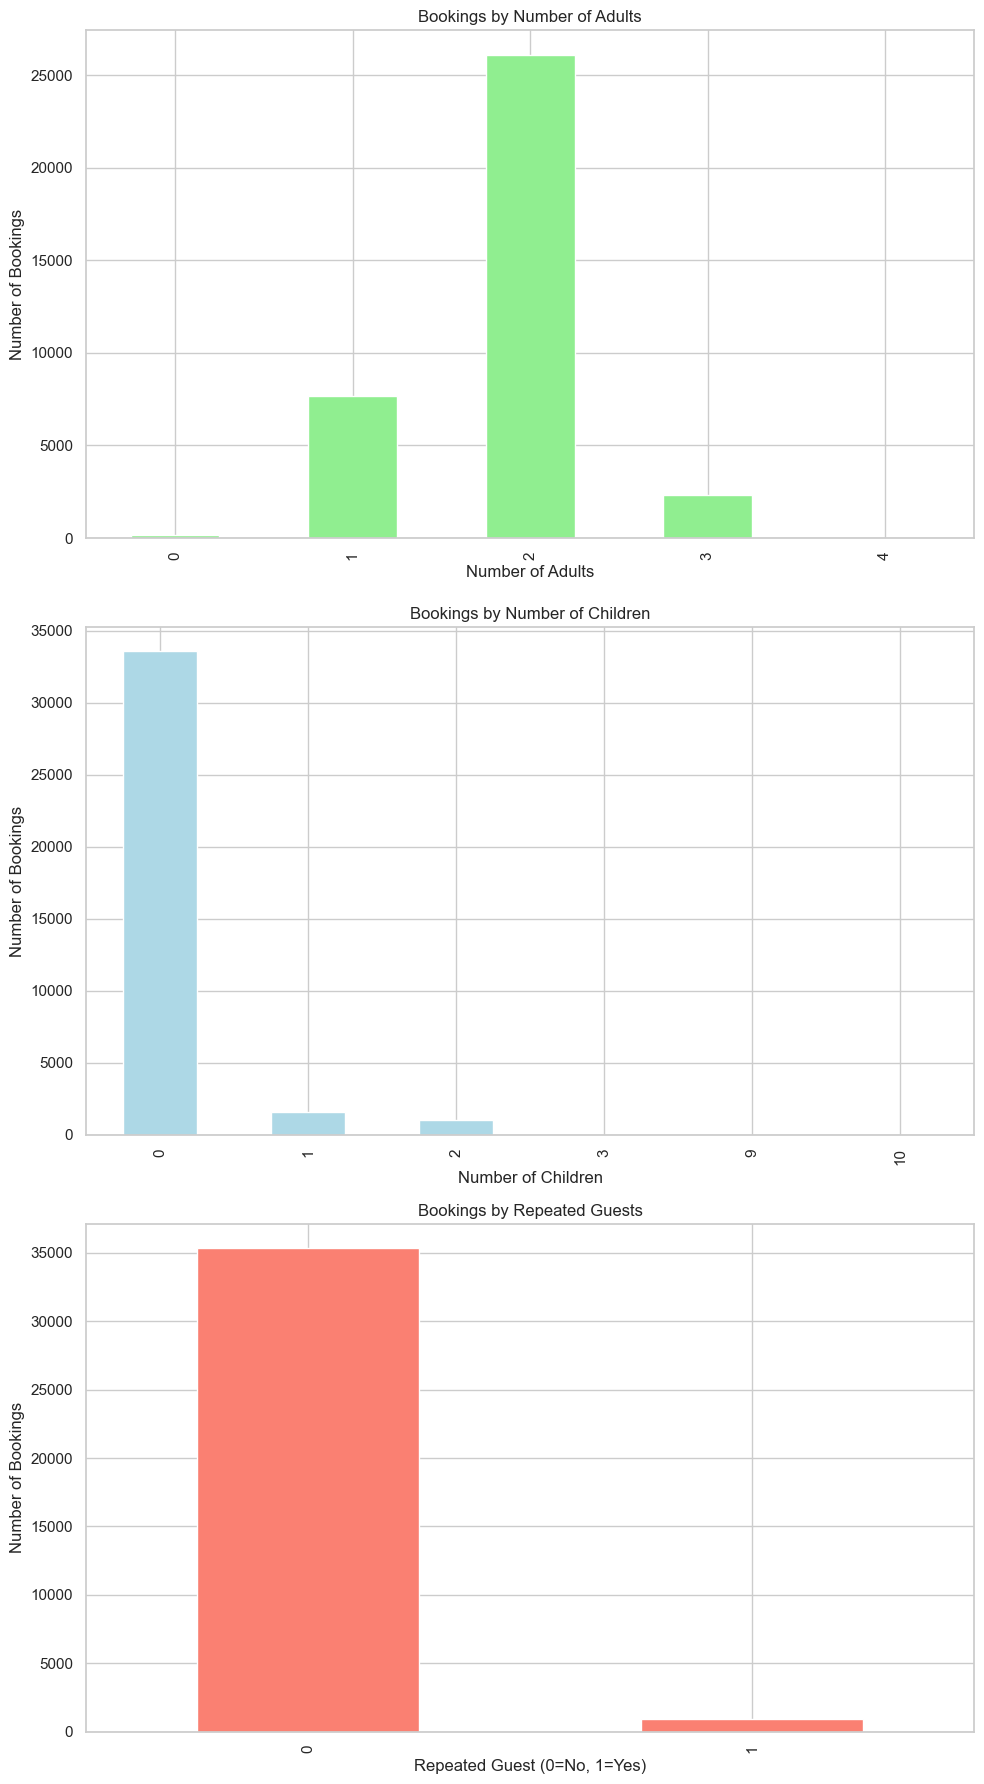

In [14]:
# distribution of bookings among different types of customers
adults_bookings = hotel.groupby('no_of_adults')['Booking_ID'].count()
children_bookings = hotel.groupby('no_of_children')['Booking_ID'].count()
repeated_guest_bookings = hotel.groupby('repeated_guest')['Booking_ID'].count()

plt.figure(figsize=(10, 18))

plt.subplot(3, 1, 1)
adults_bookings.plot(kind='bar', color='lightgreen')
plt.title('Bookings by Number of Adults')
plt.xlabel('Number of Adults')
plt.ylabel('Number of Bookings')

plt.subplot(3, 1, 2)
children_bookings.plot(kind='bar', color='lightblue')
plt.title('Bookings by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Number of Bookings')

plt.subplot(3, 1, 3)
repeated_guest_bookings.plot(kind='bar', color='salmon')
plt.title('Bookings by Repeated Guests')
plt.xlabel('Repeated Guest (0=No, 1=Yes)')
plt.ylabel('Number of Bookings')

plt.tight_layout()
plt.show()


Most common booking type is of Two Adults with no children and people dont tend to book again in our hotel

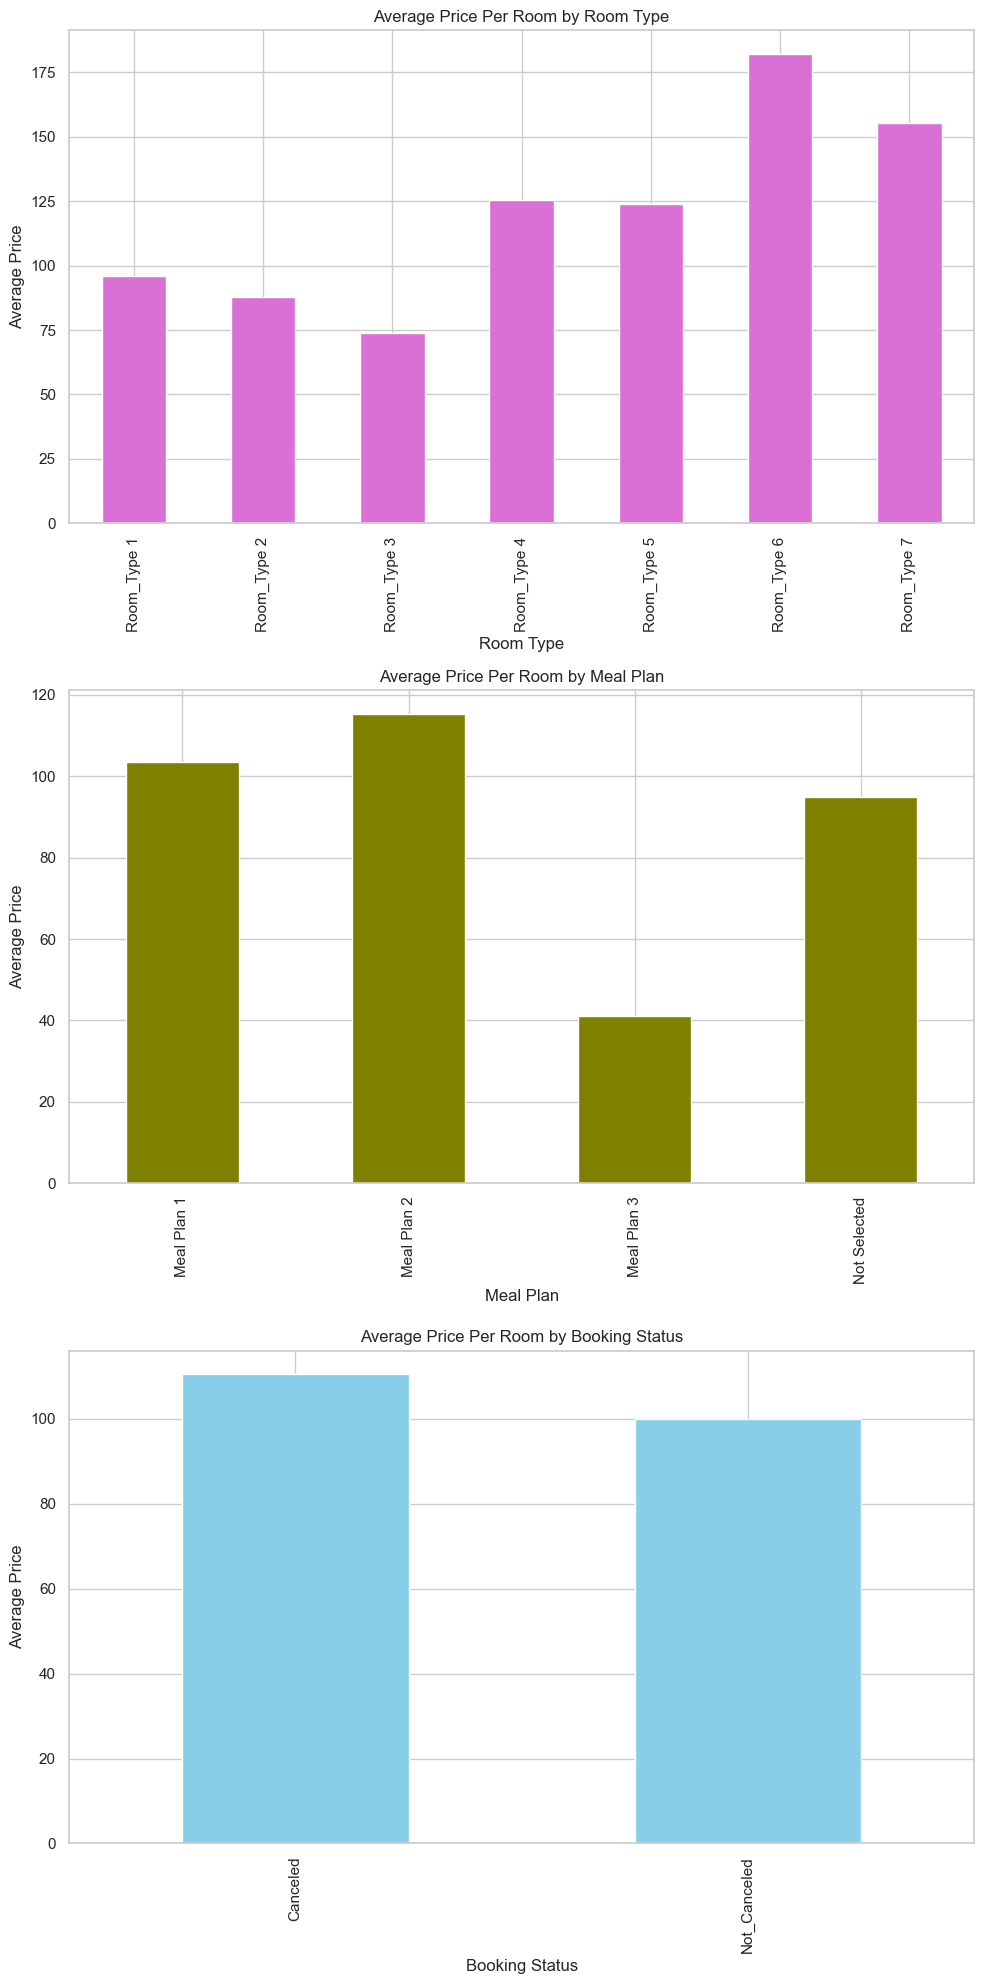

In [15]:
# 5. Price Analysis
# how the average price per room varies across different conditions
price_by_room_type = hotel.groupby('room_type_reserved')['avg_price_per_room'].mean()
price_by_meal_plan = hotel.groupby('type_of_meal_plan')['avg_price_per_room'].mean()
price_by_booking_status = hotel.groupby('booking_status')['avg_price_per_room'].mean()

plt.figure(figsize=(10, 20))

plt.subplot(3, 1, 1)
price_by_room_type.plot(kind='bar', color='orchid')
plt.title('Average Price Per Room by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')

plt.subplot(3, 1, 2)
price_by_meal_plan.plot(kind='bar', color='olive')
plt.title('Average Price Per Room by Meal Plan')
plt.xlabel('Meal Plan')
plt.ylabel('Average Price')

plt.subplot(3, 1, 3)
price_by_booking_status.plot(kind='bar', color='skyblue')
plt.title('Average Price Per Room by Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Average Price')

plt.tight_layout()
plt.show()


1. cancelled bookings had higher avg price
2. Meal plan 3 has lowest price while most booled is meal plan 1
3. Room Type 1 is most Booked and has least avg price

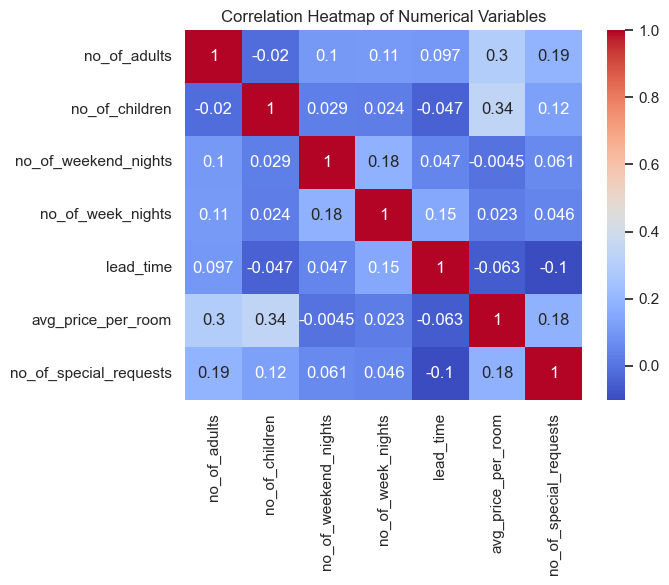

In [16]:
# 3. Correlation heatmap
sns.heatmap(hotel[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

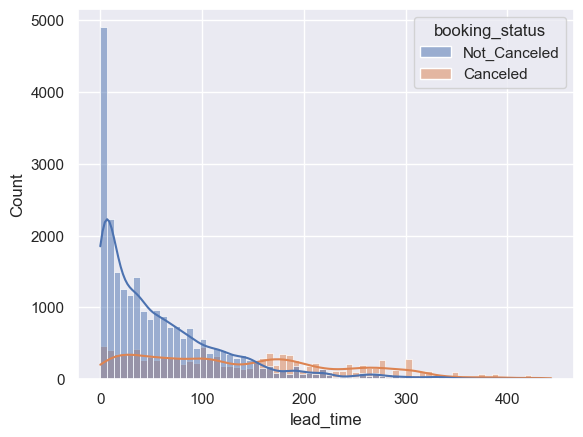

In [17]:
sns.set_style('darkgrid')
sns.histplot(data=hotel,x='lead_time',hue='booking_status',kde=True)
plt.show()

Bookings where lead time > 160 tend to cancel more often

In [18]:
categorical_columns=categorical_columns.drop('Booking_ID')

In [19]:

target_encoding = {'Canceled': 1, 'Not_Canceled': 0}
hotel['booking_status_encoded'] = hotel['booking_status'].map(target_encoding)


In [20]:

# Calculating correlations
correlations = hotel.corr(numeric_only=True)['booking_status_encoded'].sort_values()
correlations

no_of_special_requests                 -0.253070
repeated_guest                         -0.107287
required_car_parking_space             -0.086185
no_of_previous_bookings_not_canceled   -0.060179
no_of_previous_cancellations           -0.033728
arrival_month                          -0.011233
arrival_date                            0.010629
no_of_children                          0.033078
no_of_weekend_nights                    0.061563
no_of_adults                            0.086920
no_of_week_nights                       0.092996
avg_price_per_room                      0.142569
arrival_year                            0.179529
lead_time                               0.438538
booking_status_encoded                  1.000000
Name: booking_status_encoded, dtype: float64

Lead time and avg_price_per_room has some degree of =ve correlation with the dataset

no_of_special_requests have a good -ve correlation

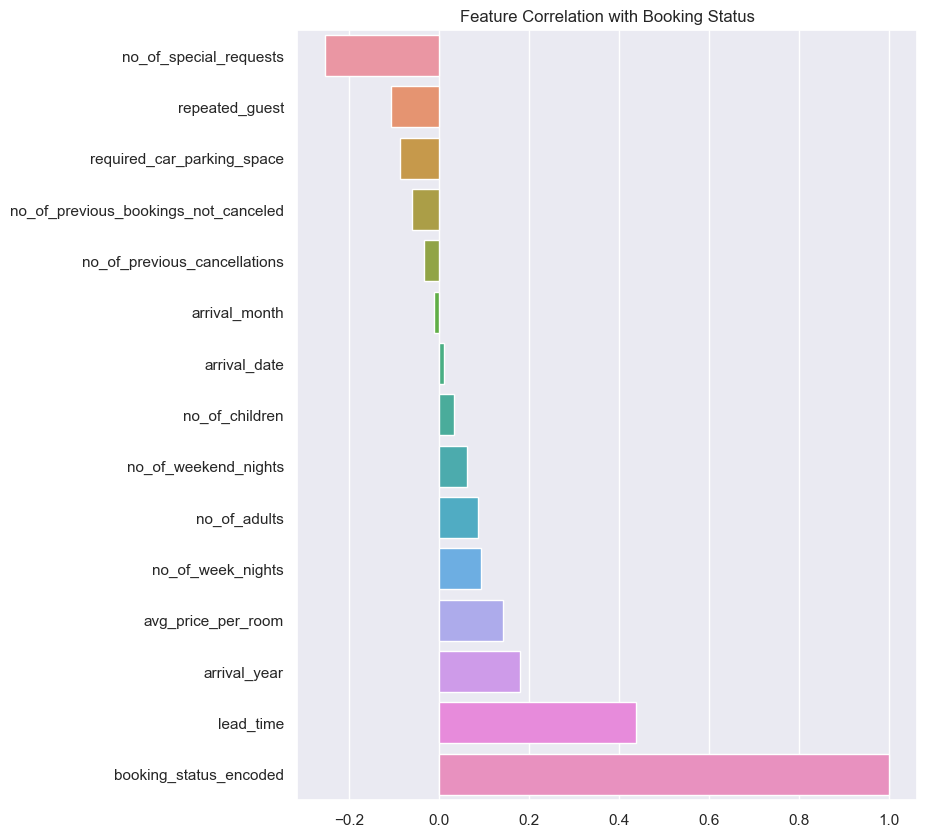

In [21]:
# Plotting the correlations
plt.figure(figsize=(8, 10))
sns.barplot(x=correlations.values, y=correlations.index)
plt.title('Feature Correlation with Booking Status')
plt.show()

In [22]:
hotel=hotel.drop(['Booking_ID','booking_status'],axis=1)

# Feature Engineering 

In [23]:


# Total Nights
hotel['total_nights'] = hotel['no_of_weekend_nights'] + hotel['no_of_week_nights']



In [24]:
# Family Size
hotel['family_size'] = hotel['no_of_adults'] + hotel['no_of_children']



In [25]:
# Is it a Weekend Stay ?(1 if any weekend nights, 0 otherwise)
hotel['is_weekend_stay'] = (hotel['no_of_weekend_nights'] > 0).astype(int)




In [26]:
# Lead Time Categories
bins = [0, 50, 150, 365, max(hotel['lead_time'])]
labels = ['Short', 'Medium', 'Long', 'Very Long']
hotel['lead_time_category'] = pd.cut(hotel['lead_time'], bins=bins, labels=labels, right=False)



In [27]:
# Season of Arrival
seasons = {12: 'Winter', 1: 'Winter', 2: 'Winter',
           3: 'Spring', 4: 'Spring', 5: 'Spring',
           6: 'Summer', 7: 'Summer', 8: 'Summer',
           9: 'Fall', 10: 'Fall', 11: 'Fall'}
hotel['season_of_arrival'] = hotel['arrival_month'].map(seasons)



In [28]:
#  Total Previous Bookings
hotel['total_previous_bookings'] = hotel['no_of_previous_cancellations'] + hotel['no_of_previous_bookings_not_canceled']



In [29]:
# 7. Price Per Night
hotel['price_per_night'] = hotel['avg_price_per_room'] / hotel['total_nights']
hotel['price_per_night'] = hotel['price_per_night'].replace([float('inf'), -float('inf')], 0)  # Handle division by zero



In [30]:
# 8. Room Type and Meal Plan Interaction
hotel['room_meal_interaction'] = hotel['room_type_reserved'] + "_" + hotel['type_of_meal_plan']



In [31]:
# 9. Weekday vs Weekend Ratio
hotel['weekday_weekend_ratio'] = hotel['no_of_week_nights'] / (hotel['no_of_weekend_nights'] + 0.01)  # Adding 0.01 to avoid division by zero

# Overview of the modified dataset
hotel.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,booking_status_encoded,total_nights,family_size,is_weekend_stay,lead_time_category,season_of_arrival,total_previous_bookings,price_per_night,room_meal_interaction,weekday_weekend_ratio
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,...,0,3,2,1,Long,Fall,0,21.666667,Room_Type 1_Meal Plan 1,1.980198
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,...,0,5,2,1,Short,Fall,0,21.336000,Room_Type 1_Not Selected,1.492537
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,...,1,3,1,1,Short,Winter,0,20.000000,Room_Type 1_Meal Plan 1,0.497512
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,...,1,2,2,0,Long,Spring,0,50.000000,Room_Type 1_Meal Plan 1,200.000000
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,...,1,2,2,1,Short,Spring,0,47.250000,Room_Type 1_Not Selected,0.990099


In [32]:
# Filling missing values in 'price_per_night' 
median_price_per_night = hotel['price_per_night'].median()
hotel['price_per_night'].fillna(median_price_per_night, inplace=True)

# Check if the missing values have been filled
remaining_missing_values = hotel['price_per_night'].isnull().sum()
remaining_missing_values


0

In [33]:
# Dropping the less relevant features
columns_to_drop = [ 'no_of_adults', 'no_of_children', 
                   'no_of_weekend_nights', 'no_of_week_nights', 
                   'lead_time', 'avg_price_per_room',
                   'arrival_year', 'arrival_month', 'arrival_date']

# Dropping the columns
hotel = hotel.drop(columns=columns_to_drop)

# Overview of the dataset after dropping unimportant features
hotel.head()


,type_of_meal_plan,required_car_parking_space,room_type_reserved,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,booking_status_encoded,total_nights,family_size,is_weekend_stay,lead_time_category,season_of_arrival,total_previous_bookings,price_per_night,room_meal_interaction,weekday_weekend_ratio
0,Meal Plan 1,0,Room_Type 1,Offline,0,0,0,0,0,3,2,1,Long,Fall,0,21.666667,Room_Type 1_Meal Plan 1,1.980198
1,Not Selected,0,Room_Type 1,Online,0,0,0,1,0,5,2,1,Short,Fall,0,21.336000,Room_Type 1_Not Selected,1.492537
2,Meal Plan 1,0,Room_Type 1,Online,0,0,0,0,1,3,1,1,Short,Winter,0,20.000000,Room_Type 1_Meal Plan 1,0.497512
3,Meal Plan 1,0,Room_Type 1,Online,0,0,0,0,1,2,2,0,Long,Spring,0,50.000000,Room_Type 1_Meal Plan 1,200.000000
4,Not Selected,0,Room_Type 1,Online,0,0,0,0,1,2,2,1,Short,Spring,0,47.250000,Room_Type 1_Not Selected,0.990099


In [34]:
# Encoding categorical features using pd.get_dummies
categorical_features = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
                        'lead_time_category', 'season_of_arrival', 'room_meal_interaction']

# Applying get_dummies to the categorical features
hotel = pd.get_dummies(hotel, columns=categorical_features,dtype=int)

# Overview of the dataset after encoding
hotel.head()


,required_car_parking_space,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,booking_status_encoded,total_nights,family_size,is_weekend_stay,total_previous_bookings,...,room_meal_interaction_Room_Type 5_Meal Plan 1,room_meal_interaction_Room_Type 5_Meal Plan 2,room_meal_interaction_Room_Type 5_Not Selected,room_meal_interaction_Room_Type 6_Meal Plan 1,room_meal_interaction_Room_Type 6_Meal Plan 2,room_meal_interaction_Room_Type 6_Not Selected,room_meal_interaction_Room_Type 7_Meal Plan 1,room_meal_interaction_Room_Type 7_Meal Plan 2,room_meal_interaction_Room_Type 7_Meal Plan 3,room_meal_interaction_Room_Type 7_Not Selected
0,0,0,0,0,0,0,3,2,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,5,2,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,3,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,2,2,1,0,...,0,0,0,0,0,0,0,0,0,0


# Decision Tree

In [35]:
X=hotel.drop('booking_status_encoded',axis=1)
y=hotel['booking_status_encoded']

In [36]:
print(X.shape)
print(y.shape)

(36275, 58)
(36275,)


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(29020, 58)
(7255, 58)
(29020,)
(7255,)


In [39]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = dt_classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.90      0.89      4878
           1       0.79      0.76      0.77      2377

    accuracy                           0.85      7255
   macro avg       0.84      0.83      0.83      7255
weighted avg       0.85      0.85      0.85      7255

[[4391  487]
 [ 572 1805]]


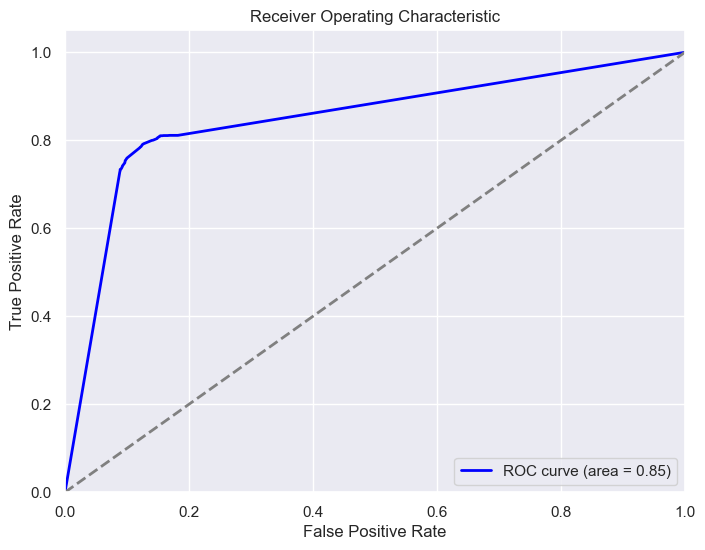

In [41]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_prob = dt_classifier.predict_proba(X_test)[:, 1]  

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
                                 
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Hyper parameter tuning using Grid Search

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_parameters)
print("Best Score:", best_score)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.8512749827705031


# K- Nearest Neighbors

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)


knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.90      0.89      4878
           1       0.79      0.75      0.77      2377

    accuracy                           0.85      7255
   macro avg       0.84      0.82      0.83      7255
weighted avg       0.85      0.85      0.85      7255

[[4414  464]
 [ 606 1771]]


In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

#  parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, verbose=2, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_parameters)
print("Best Score:", best_score)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
Best Score: 0.8499655410062026


# Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]  # probabilities for ROC-AUC

# Model evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      4878
           1       0.75      0.62      0.68      2377

    accuracy                           0.81      7255
   macro avg       0.79      0.76      0.77      7255
weighted avg       0.80      0.81      0.80      7255

Confusion Matrix:
 [[4377  501]
 [ 897 1480]]
ROC-AUC Score: 0.8650237007208103


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# XGBOOST

In [46]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [47]:

import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score



# Initialize XGBoost Classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train the model
xgb_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_clf.predict(X_test)
y_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]

# Model Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      4878
           1       0.84      0.75      0.79      2377

    accuracy                           0.87      7255
   macro avg       0.86      0.84      0.85      7255
weighted avg       0.87      0.87      0.87      7255

Confusion Matrix:
 [[4541  337]
 [ 591 1786]]
ROC-AUC Score: 0.9304044344608361


# Conclusion
Model Performance: The XGBoost model achieved an impressive 93% accuracy in predicting the booking status (canceled or not canceled) for hotel reservations. This high level of accuracy indicates that the model is highly effective in understanding and predicting guest behavior based on the data provided.

Key Features: Feature engineering played a crucial role in enhancing the model's performance. The most impactful features likely include guest details (like family size), booking characteristics (like total nights, lead time, and special requests), and other derived features from the original dataset.